/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 156ms/step - accuracy: 0.6264 - loss: 0.8555
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 154ms/step - accuracy: 0.6498 - loss: 0.6813
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 152ms/step - accuracy: 0.6417 - loss: 0.6066
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 154ms/step - accuracy: 0.6595 - loss: 0.5209
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 146ms/step - accuracy: 0.6223 - loss: 0.5080
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 145ms/step - accuracy: 0.6531 - loss: 0.4217
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 204ms/step - accuracy: 0.6259 - loss: 0.4301
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 254ms/step - accuracy: 0.8348 - loss: 0.4063
Epoch 9/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 233ms/step - accuracy: 0.7374 - loss: 0.3653
Epoch 10/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 151ms/step - accuracy: 0.8707 - loss: 0.3428
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.9333 - loss: 0.3060
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8394 - loss: 0.4009
Training accura

<ipython-input-3-9c6e579e3fc1>:68: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(f"True: {Y_test_subset[idx]}, Pred: {int(predictions_subset[idx] > 0.5)}")


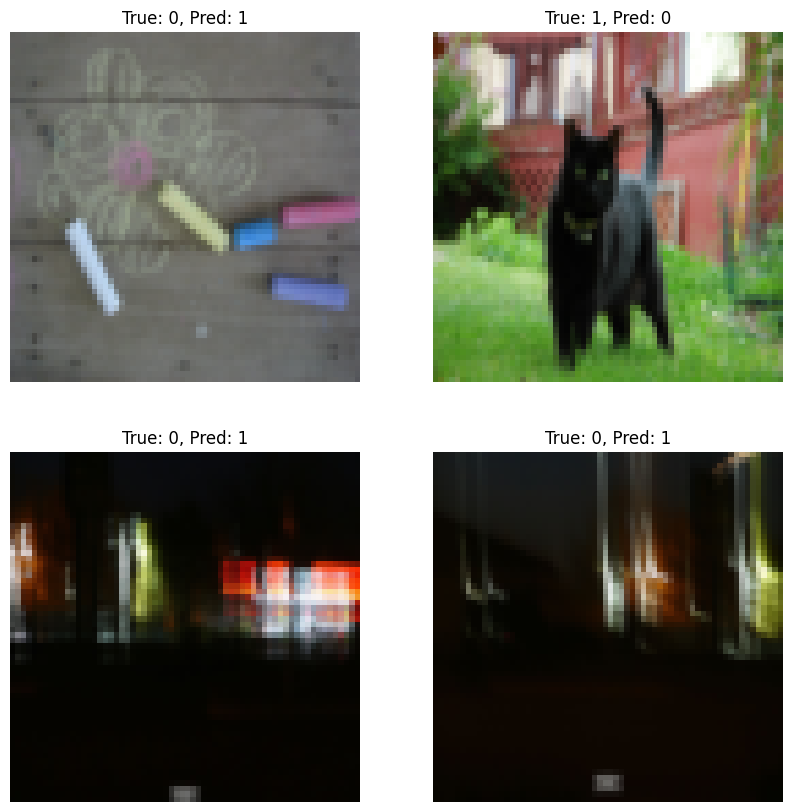

In [3]:
import h5py
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam

# Load the original dataset
train_data = h5py.File('train_catvnoncat.h5', 'r')

# Extract images and labels from the training dataset
X_train = np.array(train_data['train_set_x'][:])  # Training images
Y_train = np.array(train_data['train_set_y'][:])  # Training labels

# Use the first 166 images for training and the remaining 43 for testing
# SB ID is 109306056, last digit is 6, 160 + 6 = 166
X_train_subset = X_train[:166]
Y_train_subset = Y_train[:166]
X_test_subset = X_train[166:209]
Y_test_subset = Y_train[166:209]

# Normalize the data
X_train_subset = X_train_subset / 255.0
X_test_subset = X_test_subset / 255.0

# Define the model again
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(X_train_subset.shape[1], X_train_subset.shape[2], X_train_subset.shape[3])),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')  # For binary classification
])

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model on the subset of data
model.fit(X_train_subset, Y_train_subset, epochs=10, batch_size=32)

# Evaluate the model on the new test subset
train_loss, train_acc = model.evaluate(X_train_subset, Y_train_subset)
test_loss, test_acc = model.evaluate(X_test_subset, Y_test_subset)

# Output the training and test accuracies
print(f"Training accuracy: {train_acc:.4f}")
print(f"Test accuracy: {test_acc:.4f}")

# Predict on the test subset
predictions_subset = model.predict(X_test_subset)

# Find the indices of incorrect predictions
incorrect_indices_subset = [i for i in range(len(predictions_subset)) if (predictions_subset[i] > 0.5) != Y_test_subset[i]]

# Output the indices of the failed predictions
print("Indices of incorrect predictions (modified dataset):", incorrect_indices_subset)

# Display the last 4 failed images from the modified test set
plt.figure(figsize=(10, 10))
for i, idx in enumerate(incorrect_indices_subset[-4:]):
    plt.subplot(2, 2, i + 1)
    plt.imshow(X_test_subset[idx])
    plt.title(f"True: {Y_test_subset[idx]}, Pred: {int(predictions_subset[idx] > 0.5)}")
    plt.axis('off')
plt.show()